In [1]:
from scipy import constants

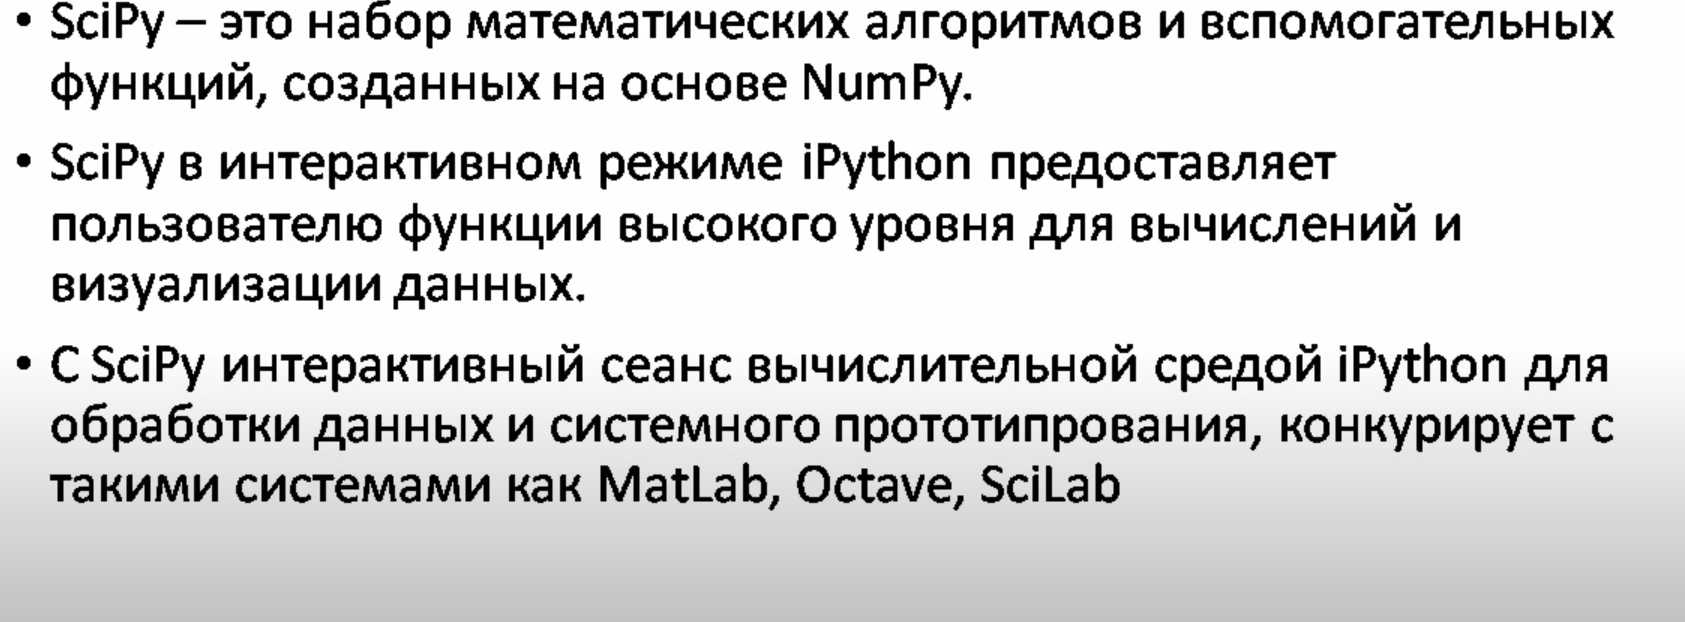
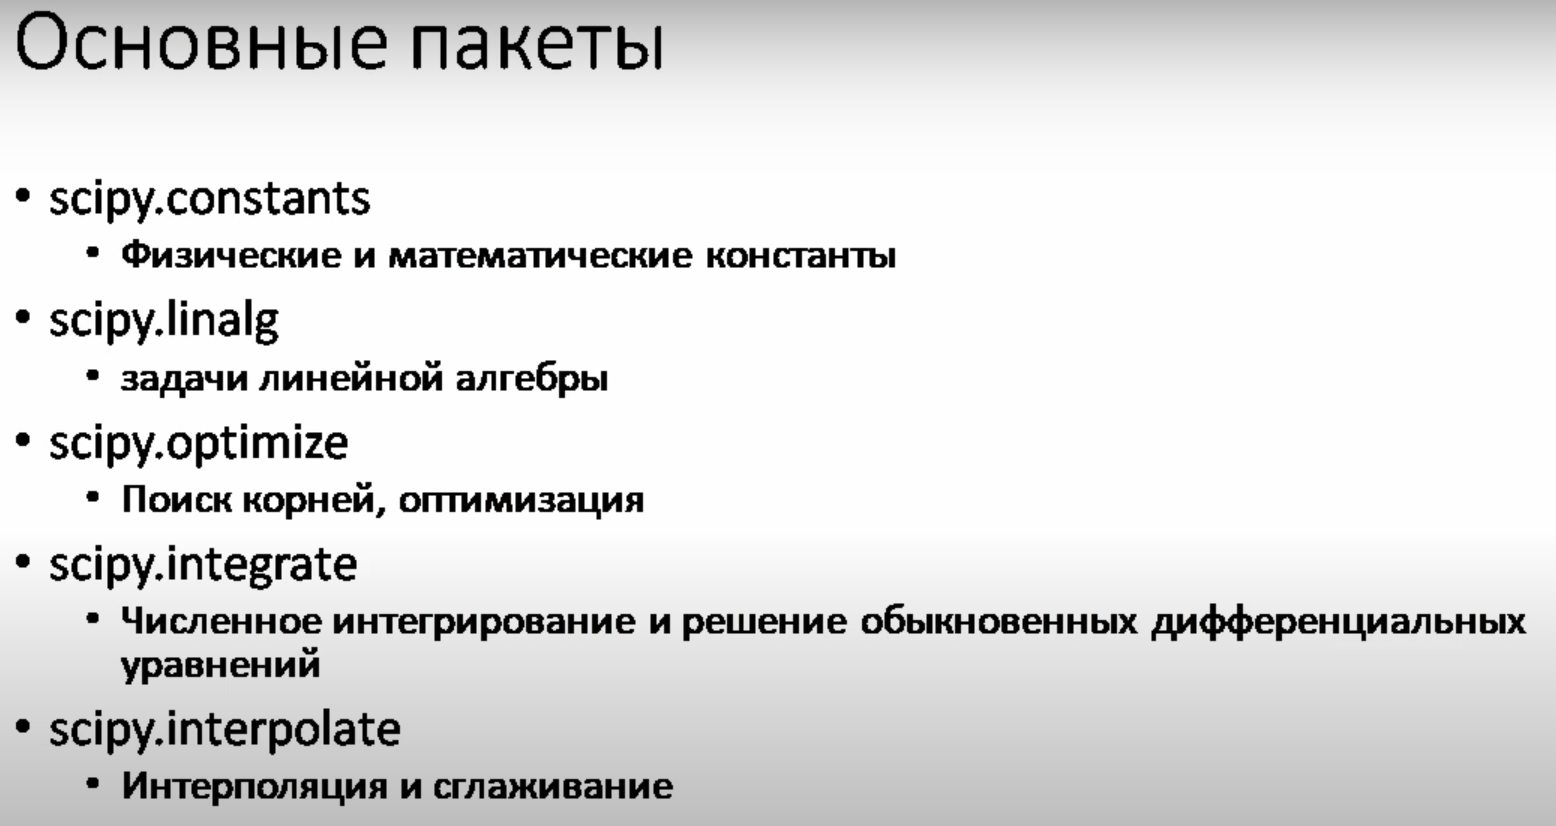

## Константы

In [2]:
constants.g # ускорение свободного падения

9.80665

In [3]:
constants.G # гравитационная постоянная

6.6743e-11

In [4]:
constants.c # скорость света в вакууме

299792458.0

In [5]:
constants.m_e # масса покоя электрона 

9.1093837015e-31

## ...

In [6]:
constants.physical_constants

{'Wien displacement law constant': (0.0028977685, 'm K', 5.1e-09),
 'atomic unit of 1st hyperpolarizablity': (3.20636151e-53,
  'C^3 m^3 J^-2',
  2.8e-60),
 'atomic unit of 2nd hyperpolarizablity': (6.2353808e-65,
  'C^4 m^4 J^-3',
  1.1e-71),
 'atomic unit of electric dipole moment': (8.47835309e-30, 'C m', 7.3e-37),
 'atomic unit of electric polarizablity': (1.648777274e-41,
  'C^2 m^2 J^-1',
  1.6e-49),
 'atomic unit of electric quadrupole moment': (4.48655124e-40,
  'C m^2',
  3.9e-47),
 'atomic unit of magn. dipole moment': (1.8548019e-23, 'J T^-1', 1.6e-30),
 'atomic unit of magn. flux density': (235051.756758, 'T', 7.1e-05),
 'deuteron magn. moment': (4.33073482e-27, 'J T^-1', 3.8e-34),
 'deuteron magn. moment to Bohr magneton ratio': (0.0004669754567, '', 5e-12),
 'deuteron magn. moment to nuclear magneton ratio': (0.8574382329,
  '',
  9.2e-09),
 'deuteron-electron magn. moment ratio': (-0.0004664345548, '', 5e-12),
 'deuteron-proton magn. moment ratio': (0.3070122084, '', 4.5

In [7]:
constants.physical_constants['Planck constant in eV/Hz'] # в формате (значение, единица измерения, погрешность измерения)

(4.135667696e-15, 'eV Hz^-1', 0.0)

## Множители (константы) 

In [8]:
constants.giga, constants.mega, constants.milli, constants.nano

(1000000000.0, 1000000.0, 0.001, 1e-09)

In [9]:
# 1 градус в радианах 
constants.degree

0.017453292519943295

In [10]:
# минута дуги в радианах
constants.arcminute

0.0002908882086657216

In [11]:
# секунда дуги в радианах
constants.arcsecond

4.84813681109536e-06

In [12]:
constants.minute, constants.hour, constants.day, constants.week, constants.year 
# секунд в минуте, часе, дне, неделе, годе 

(60.0, 3600.0, 86400.0, 604800.0, 31536000.0)

### Константы длины 

In [13]:
(
constants.inch, # дюйм в метрах
constants.mile, # миля в метрах
constants.micron, # микрон в метрах
constants.light_year, # световой год в метрах
constants.parsec, # парсек в метрах
)

(0.0254, 1609.3439999999998, 1e-06, 9460730472580800.0, 3.085677581491367e+16)

### Константы давления

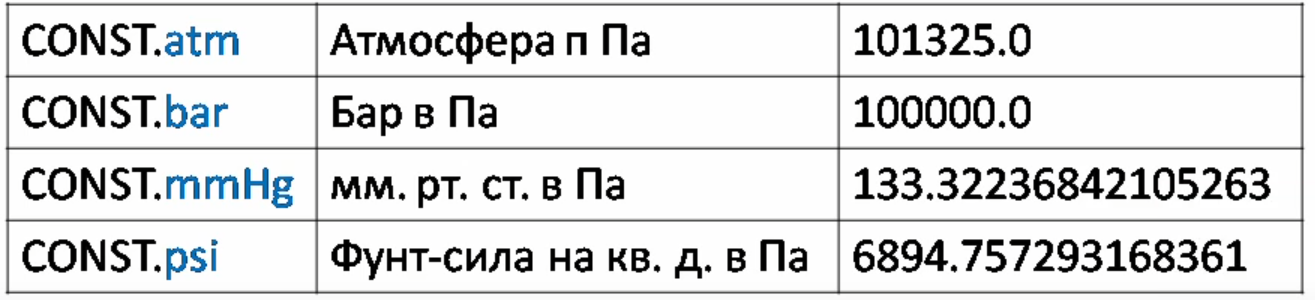

### Сила, давление и мощность

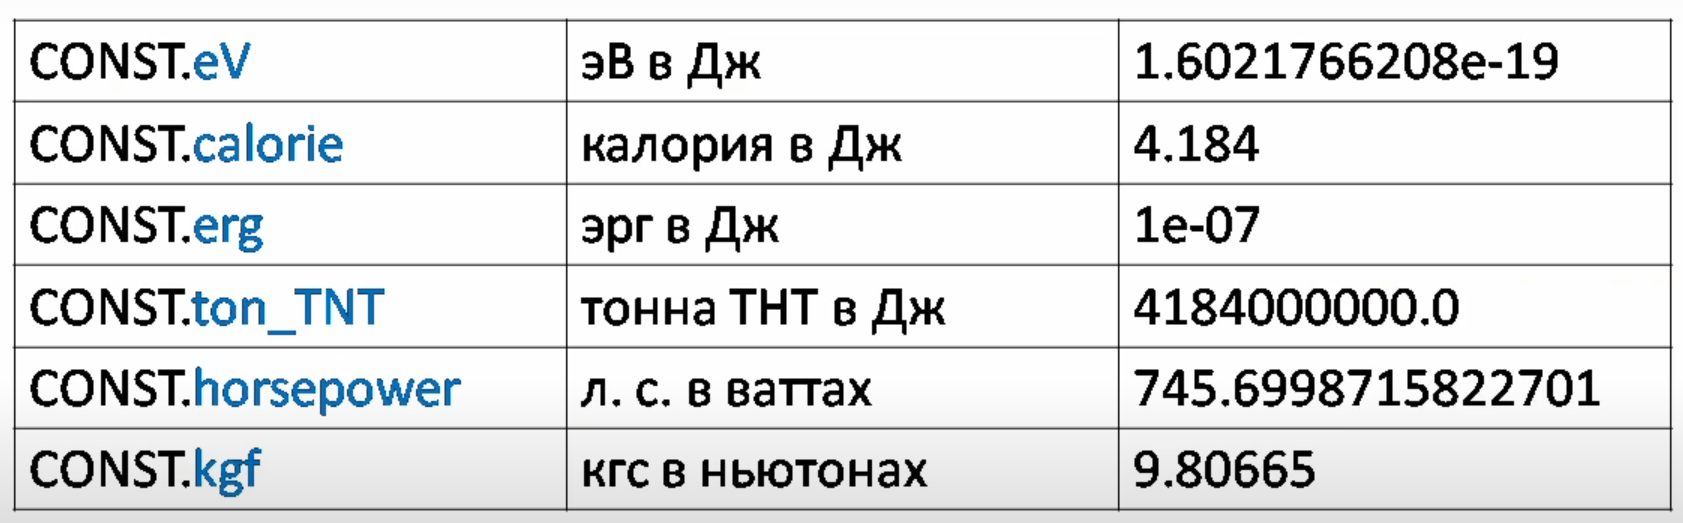

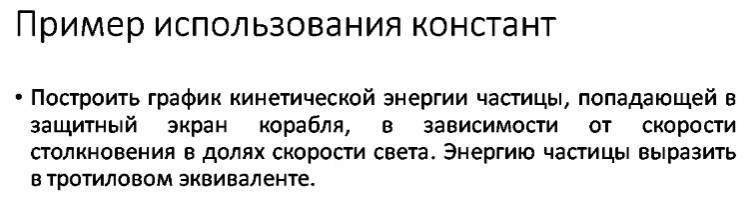

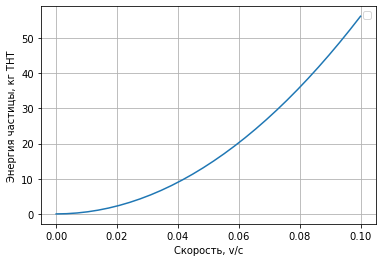

In [14]:
import numpy as np
from matplotlib import pyplot as plt
r = 0.0005
dens = 1000.0
m = 4 / 3 * constants.pi * r ** 3 * dens
v = np.linspace(0, 0.1, 30)
en = m * (v * constants.c) ** 2 / 2
en = en / constants.ton_TNT * 1000
plt.grid(True)
plt.legend('m = 0.52', loc='best')
plt.ylabel('Энергия частицы, кг ТНТ')
plt.xlabel('Скорость, v/c')
plt.plot(v, en)


# scipy.linalg

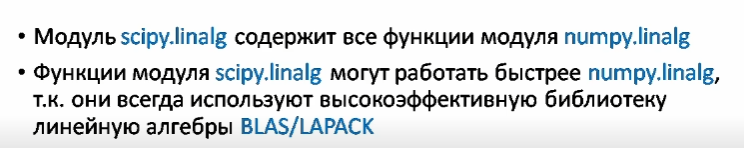

In [15]:
from scipy import linalg

In [16]:
a = np.matrix([[1, 2], [3, 4]])
a

matrix([[1, 2],
        [3, 4]])

In [17]:
linalg.inv(a) # обратная матрица
# (ошибка округления возникает так как используются итеративные алгоритмы)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Решение СЛУ 

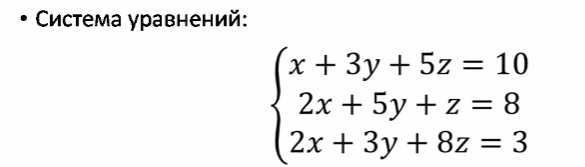

1. Через обратную матрицу (недостаток этого метода - его медлительность).

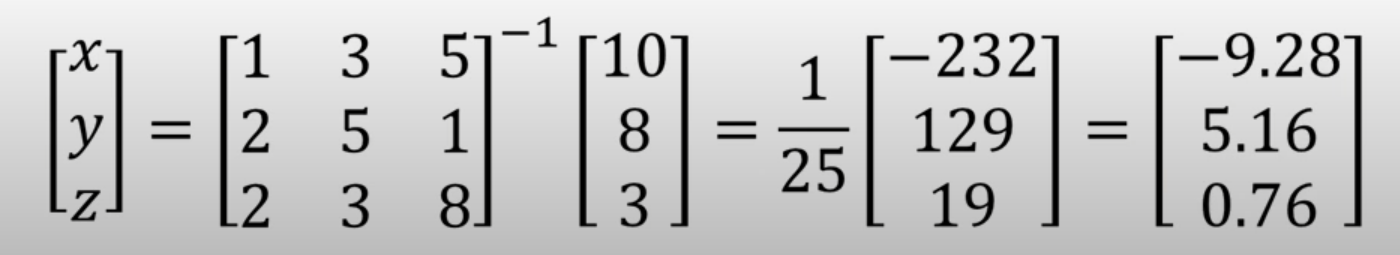

In [18]:
a = [
    [1, 3, 5],
    [2, 5, 1],
    [2, 3, 8],
    ]
a = np.array(a)
np.dot(linalg.inv(a), np.array([10, 8, 3]))

array([-9.28,  5.16,  0.76])

2. Через функцию solve (испольщует LU разложение, поэтому является более быстрой)

In [19]:
linalg.solve(a, np.array([10, 8, 3]))

array([-9.28,  5.16,  0.76])

# Вычисление определителя матрицы

In [20]:
a

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [21]:
linalg.det(a) # погрешномсть из-за применения lU-разложения

-25.000000000000004

# Нахождение собственных векторов и собчтвенных значений

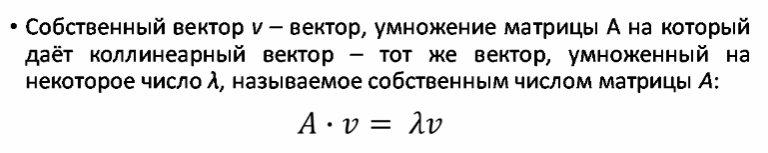

In [22]:
a

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [23]:
lamb, v = linalg.eig(a)
# lamb - собственные значения
# v - собственные вектора

In [24]:
lamb

array([10.5540456 +0.j, -0.5873064 +0.j,  4.03326081+0.j])

In [25]:
v

array([[-0.51686204, -0.94195144,  0.11527992],
       [-0.32845853,  0.31778071, -0.81936883],
       [-0.79054957,  0.10836468,  0.56155611]])

# Интерполирование

## Функции одной переменной

In [26]:
from scipy.interpolate import interp1d

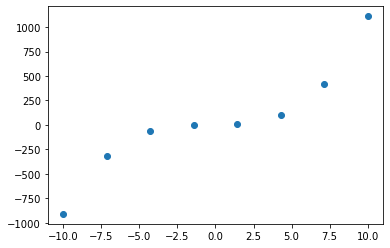

In [27]:
x = np.linspace(-10, 10, 8, endpoint=True)
y = x**3 + x**2 + x + 1
# эти массивы задают точки по которым будет 
# производится интерполяция
plt.scatter(x, y)

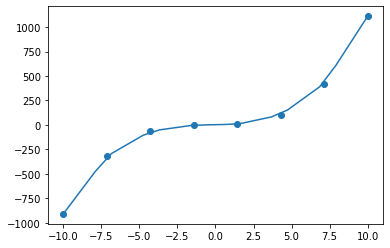

In [28]:
y_in = interp1d(x, y) # получим функцию интерполяции 
# в данном случае интерполяция линейная
arguments = np.linspace(-10, 10, 20, endpoint=True)
plt.plot(arguments, y_in(arguments))
plt.scatter(x, y)

Как видно, линейная интерполяция не дает ожидаемого результата (уровень сглаживания недостаточен) 

## Кубическая интерполяция

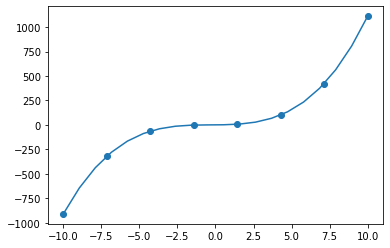

In [29]:
y_in = interp1d(x, y, kind='cubic') 
# в данном случае интерполяция кубическая
arguments = np.linspace(-10, 10, 20, endpoint=True)
plt.plot(arguments, y_in(arguments))
plt.scatter(x, y)

# Решение уравнений

Решим уравнение cos(x) + 5 * sin(x) = 0

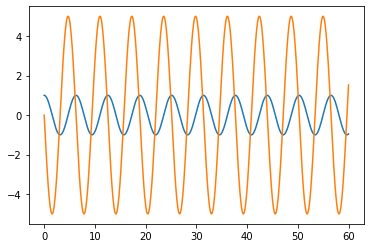

In [30]:
# cos(x) = -5sin(x)
x = np.linspace(0, 60, 500)
f = interp1d(x, np.cos(x))
g = interp1d(x, -5 * np.sin(x), kind='cubic')
x = np.linspace(0, 60, 600)
plt.plot(x, f(x), x, g(x))

In [31]:
from scipy.optimize import root
def f(x):
    return np.cos(x) + 5 * np.sin(x)
# само уравнение задается в виде функции (f)

In [32]:
# root - метод предназначенный для нахождения корней 
# нелинейного уравнения
# 3 начальное приблежение (точка в окрестности которой ищется корень)
sol = root(f, 3)
sol.x, sol.success

(array([2.94419709]), True)

In [33]:
f(-0.19739556)

-7.654609168739057e-10

# Решение системы нелинейных уравнений

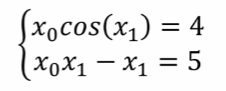

In [34]:
def sys(x): # x - массив аргументов
    f = [x[0] * np.cos(x[1]) - 4, x[0] * x[1] - x[1] - 5]
    return f
sol = root(sys, [1, 1])
sol.x, sol.success

(array([6.50409711, 0.90841421]), True)

In [35]:
sys([sol.x[0], sol.x[1]])

[3.732125719579926e-12, 1.617106448748018e-11]

# Поиск минимума функции (модуль optimize)

Представим такую ситуацию: есть учачток суши, на котором расположена стартовая точка A. конечная точка B расположена в воде на удалении от A. Будем считать, что скорость движения в воде (v2) значительно меньше v1 - скорости движения по суше. Необходимо найти длину путей по суше (OAо) и по воде (OBо), при которых время tAB, затраченое на прохождение всего будет минимальным.

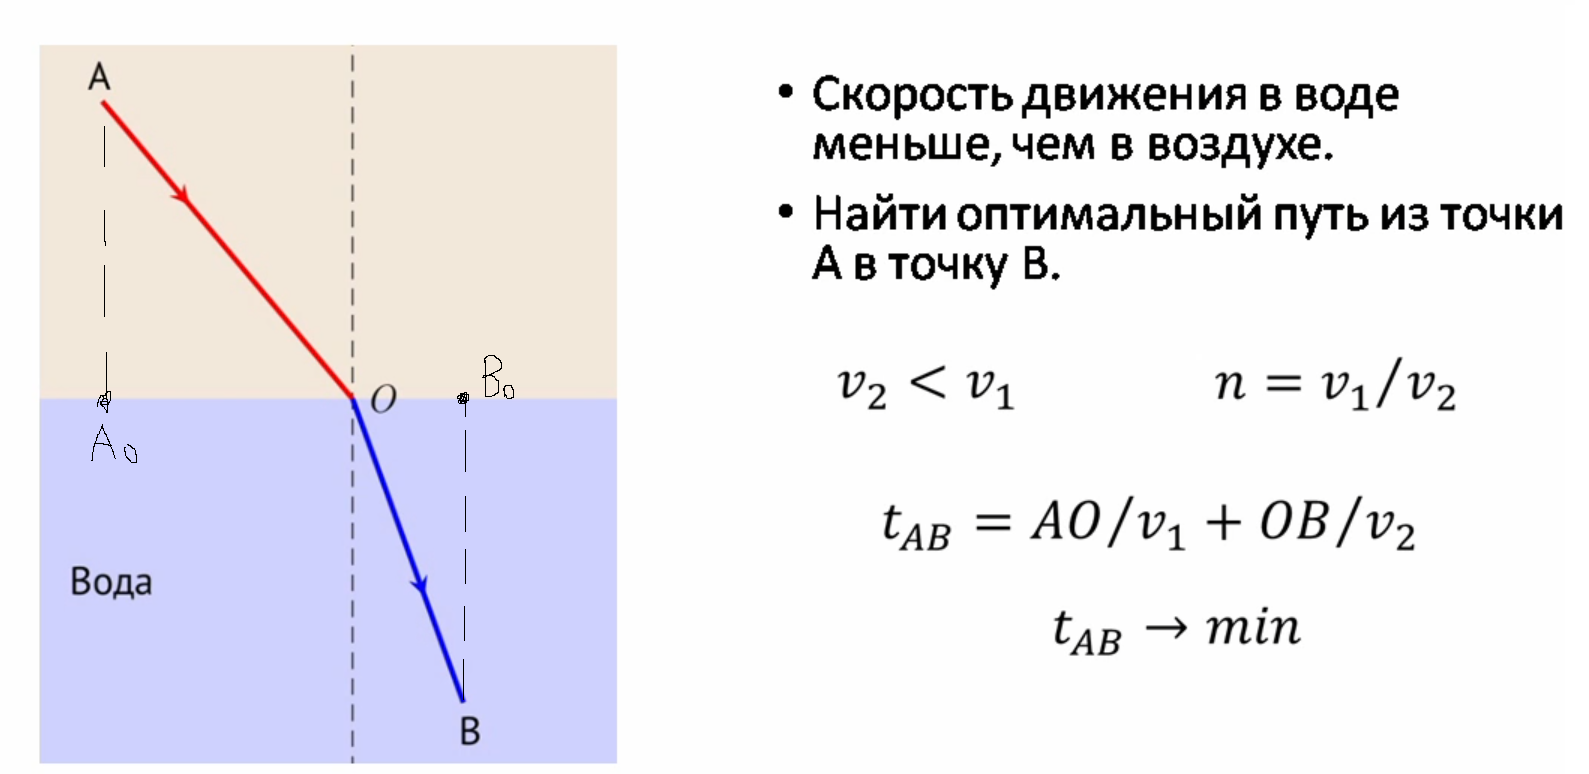

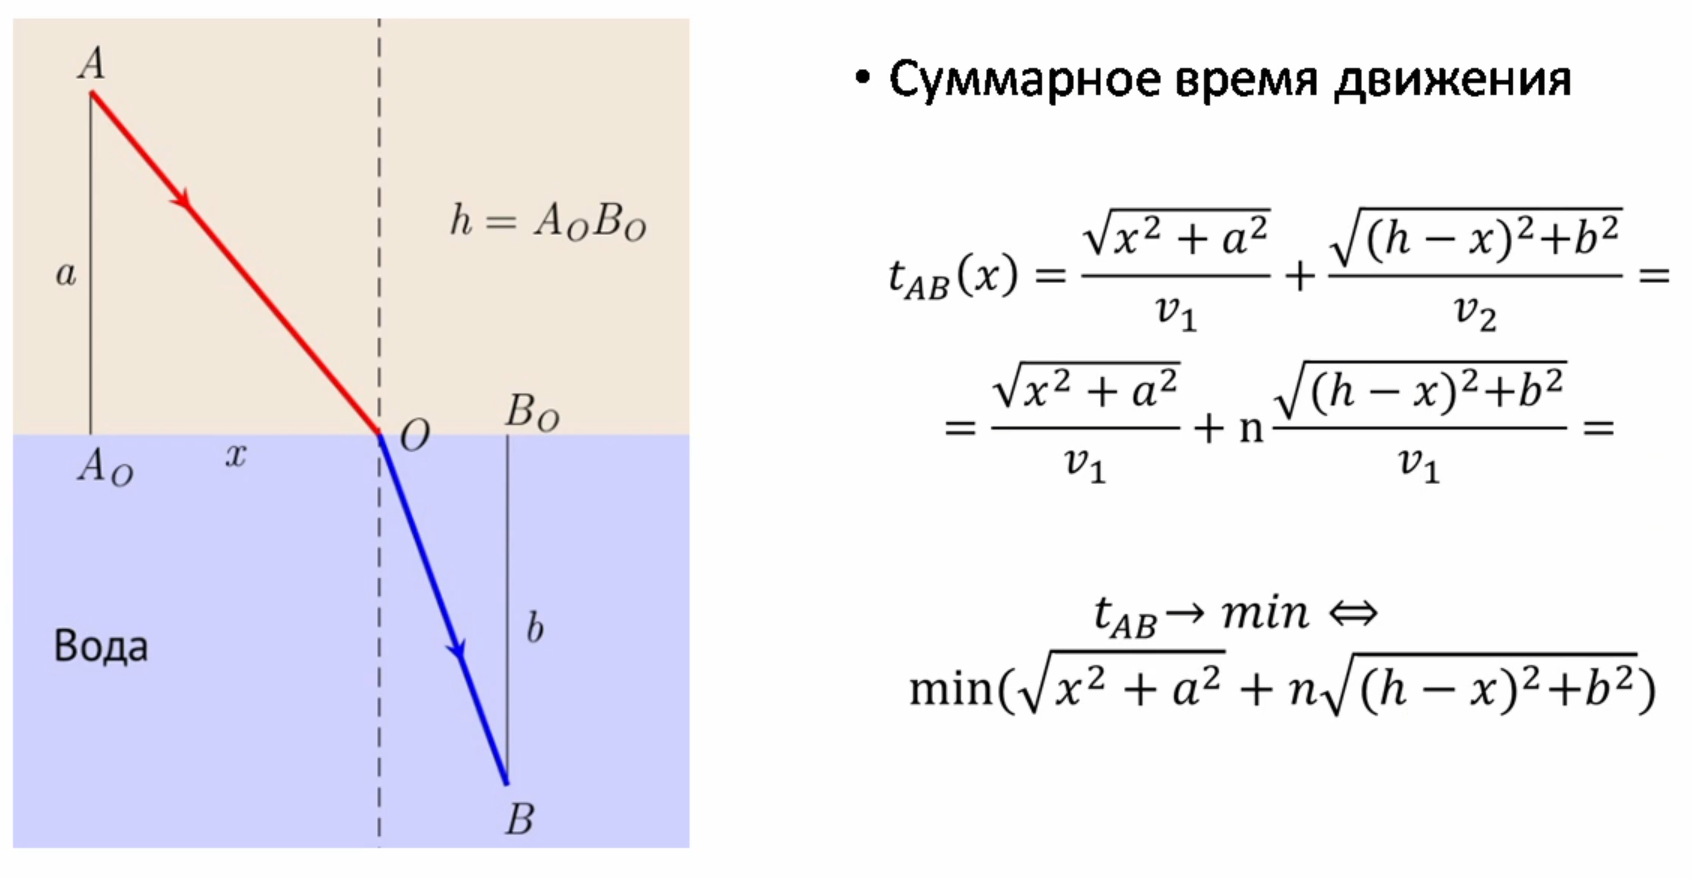

In [36]:
from scipy.optimize import minimize
def time_f(x, a, b, h, v, n):
    pa = np.sqrt(x ** 2 + a ** 2)
    pb = np.sqrt((h - x) ** 2 + b ** 2)
    return pa / v + pb * n / v
# 2.5 - начальное приближение (я)
sol = minimize(time_f, 2.5, args = (10.0, 10.0, 10.0, 4.0, 2.0))
print(sol.x, sol.fun, sol.success)

[7.00534301] 8.271791334231555 True


In [37]:
time_f(7.00534301, 10.0, 10.0, 10.0, 4.0, 2.0)

8.271791334231555

# Определенные интегралы

Необходимо вычислить:

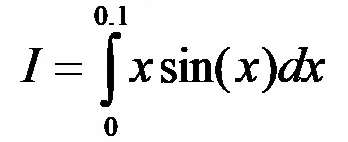

In [38]:
from scipy import integrate
res = integrate.quad(lambda x: x * np.sin(x), 0.0, 0.1)
# quad - метод выполняющий расчет интеграла 
# от одной переменной
res # содержит кортеж (расчитаное значение, погрешность)

(0.00033300011902557576, 3.6970439934511184e-18)

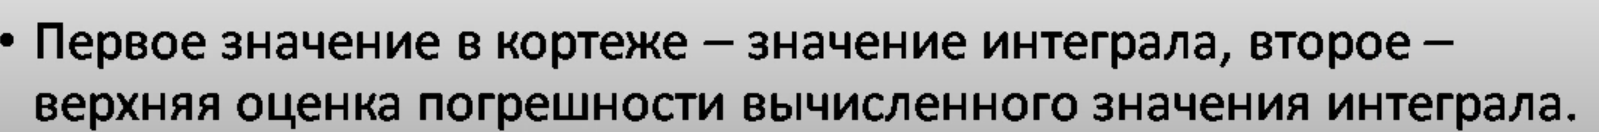

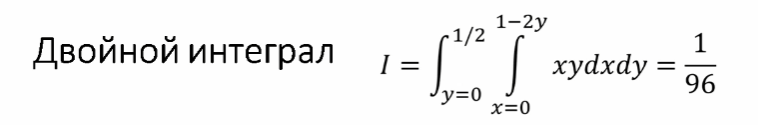

In [39]:
def integral(x, y):
    return x * y
# 0.0, 0.5 - для переменной y,
# через lambda фуункции задаются
# области определения x в зависемости от y
res = integrate.dblquad(integral, 0.0, 0.5, 
                        lambda y : 0, 
                        lambda y: 1 - 2 * y)
res

(0.010416666666666668, 4.101620128472366e-16)

# Интегририрование табличной функции

In [40]:
from scipy.integrate import simps
x = np.random.choice(10, replace=False, size=5)
y = np.random.choice(10, replace=False, size=5)
x.sort()

In [41]:
x

array([0, 1, 2, 6, 7])

In [42]:
y

array([8, 5, 2, 4, 3])

In [43]:
simps(y, x)

28.75

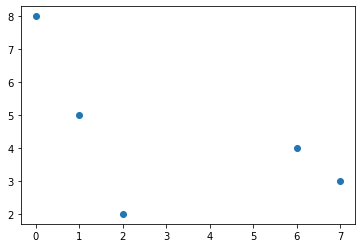

In [44]:
plt.scatter(x, y)

# Решение обыкновенных дифференциальных уравнений

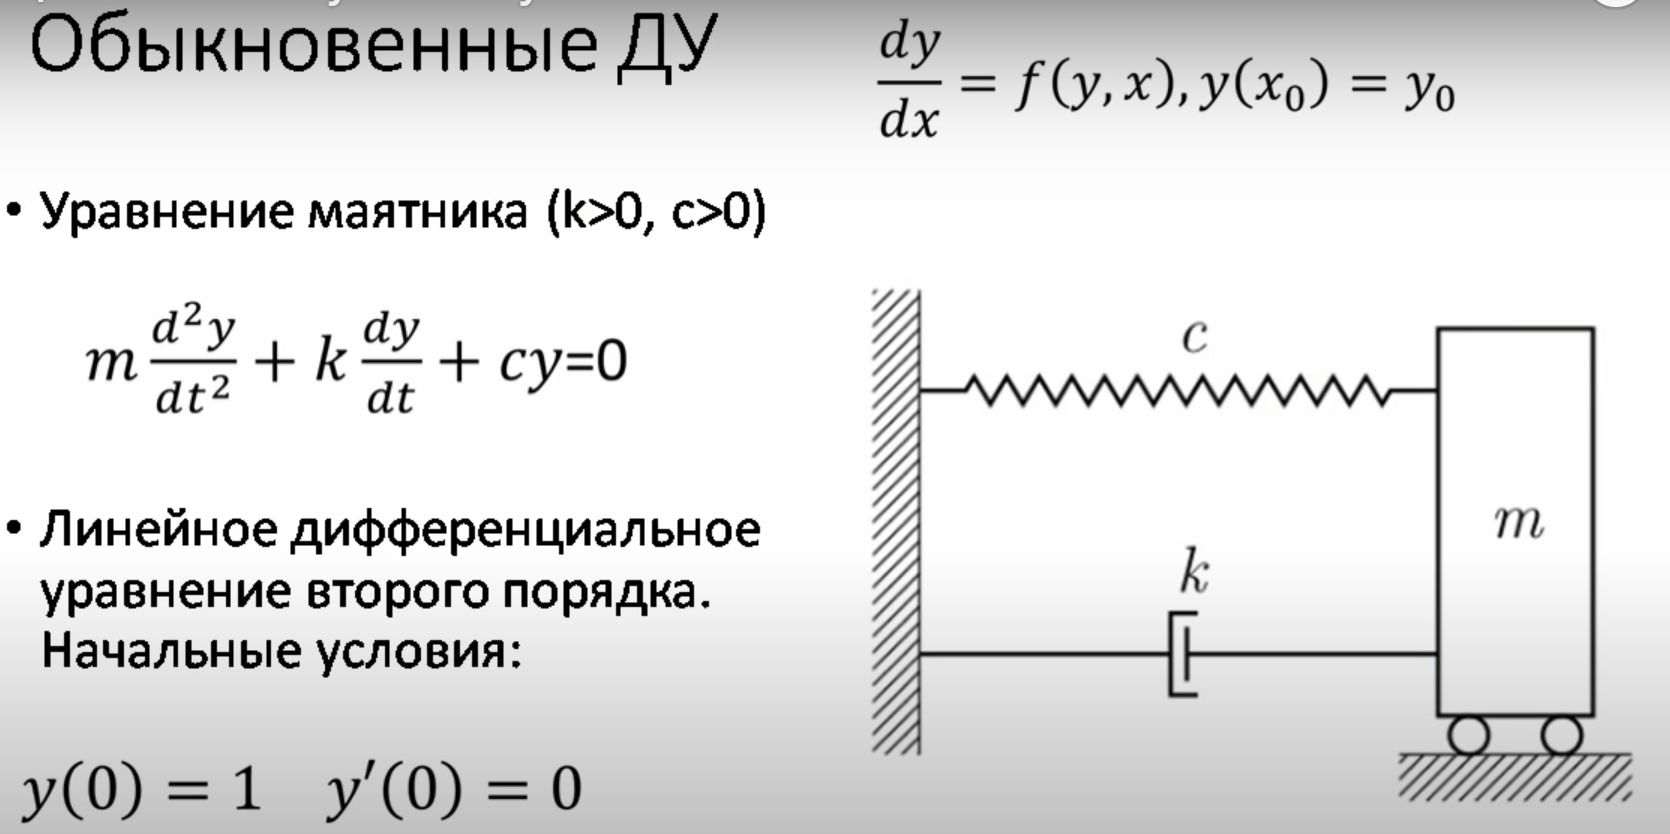

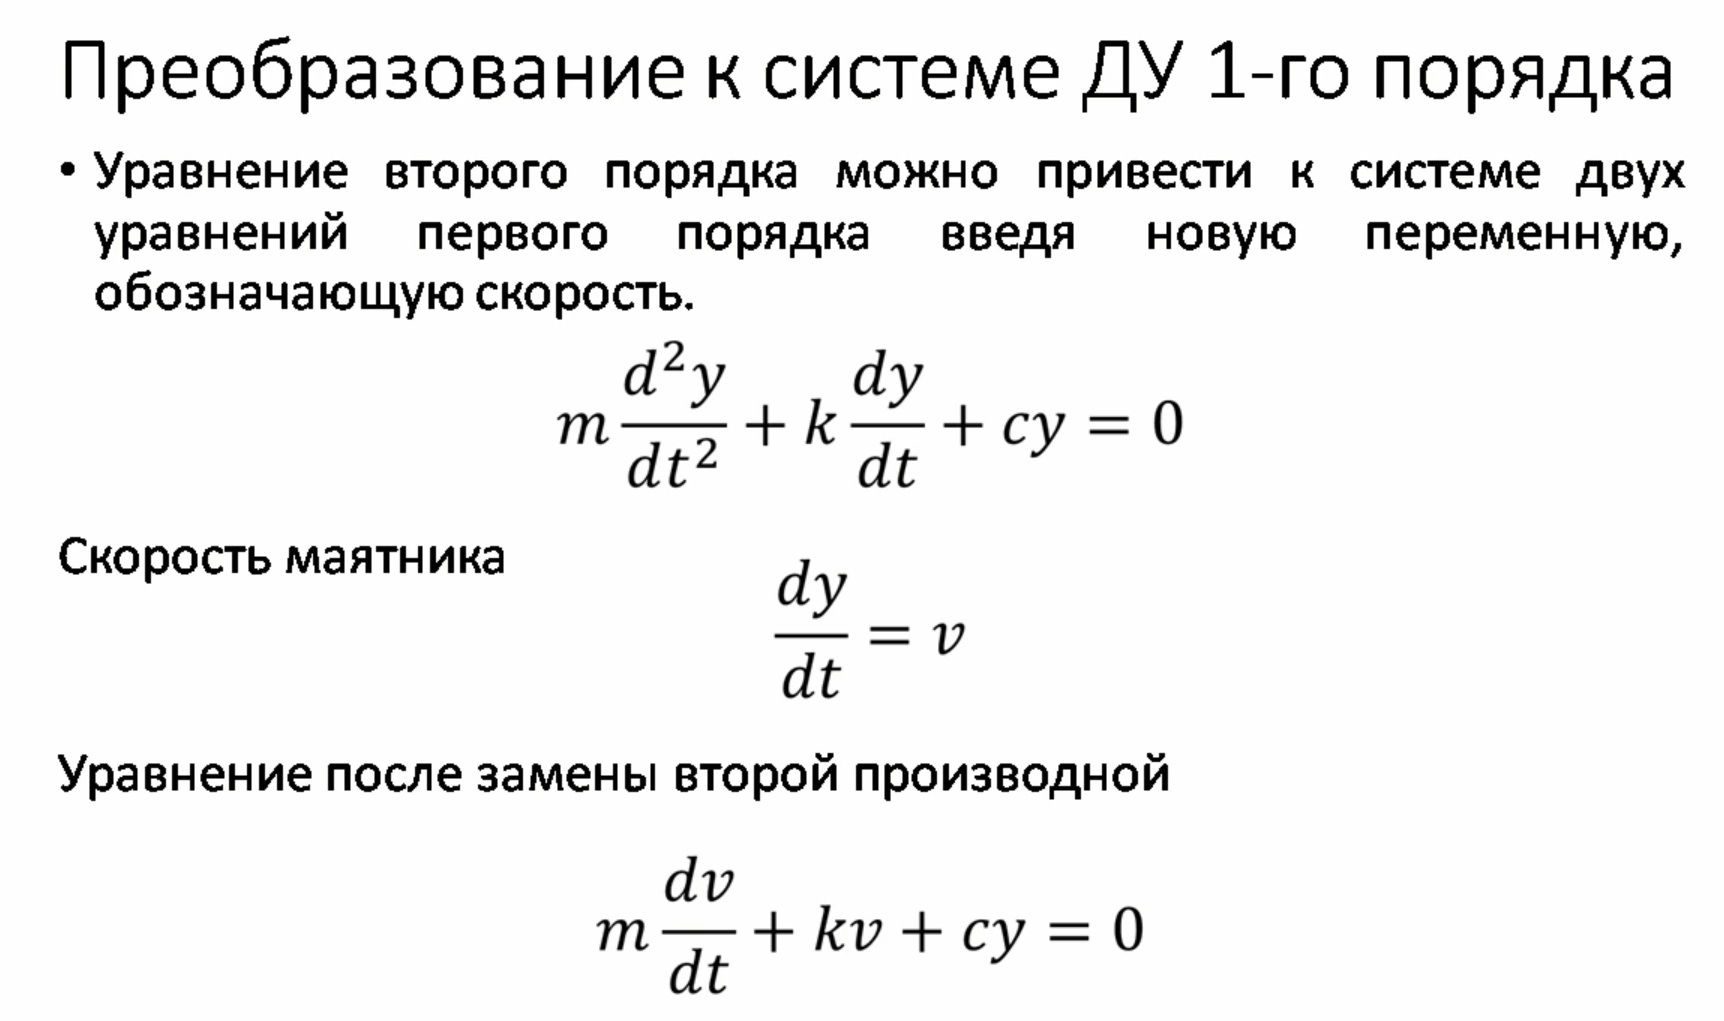

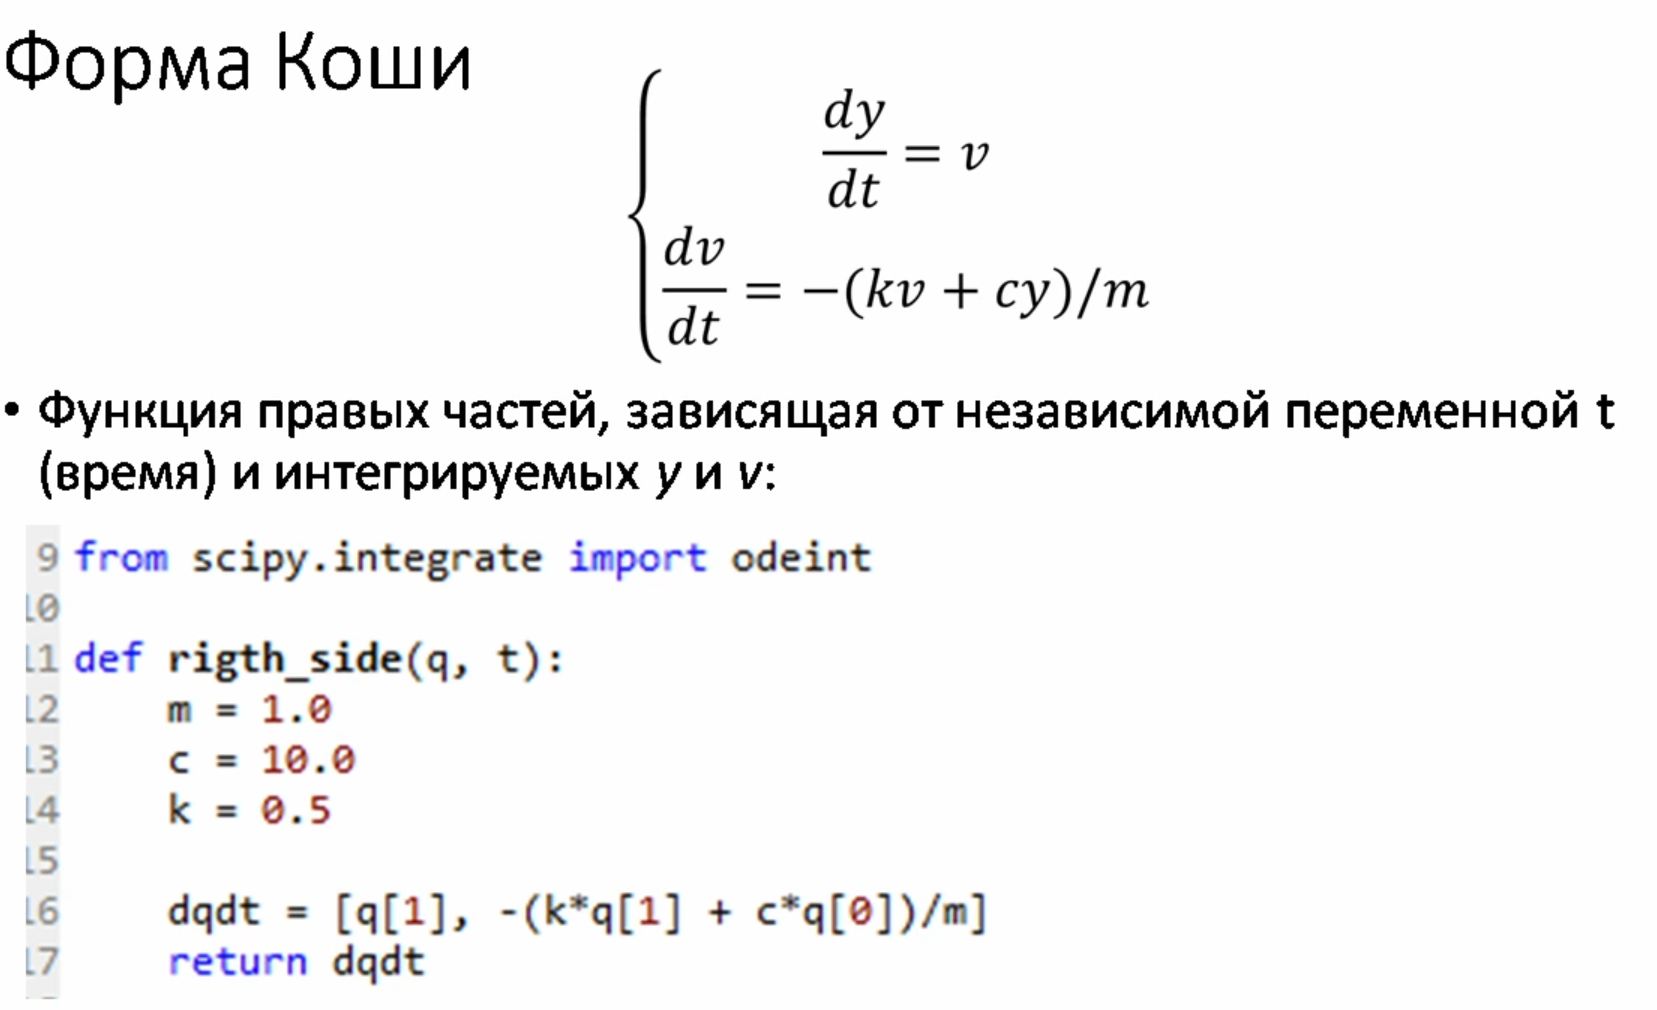

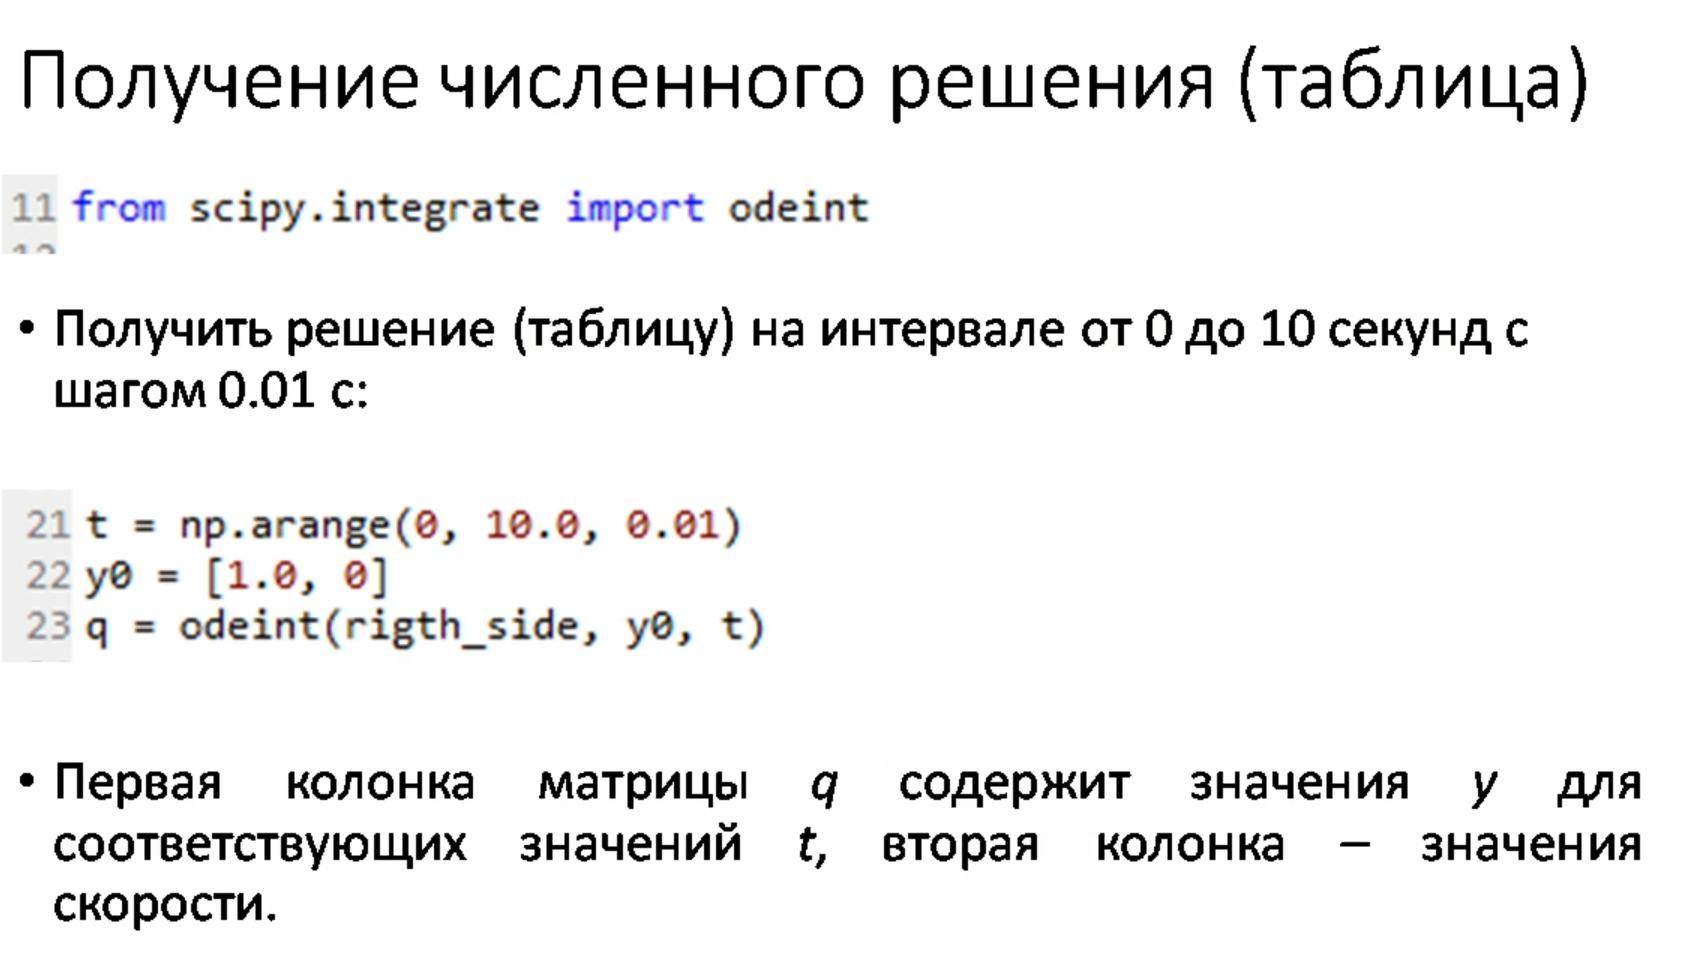

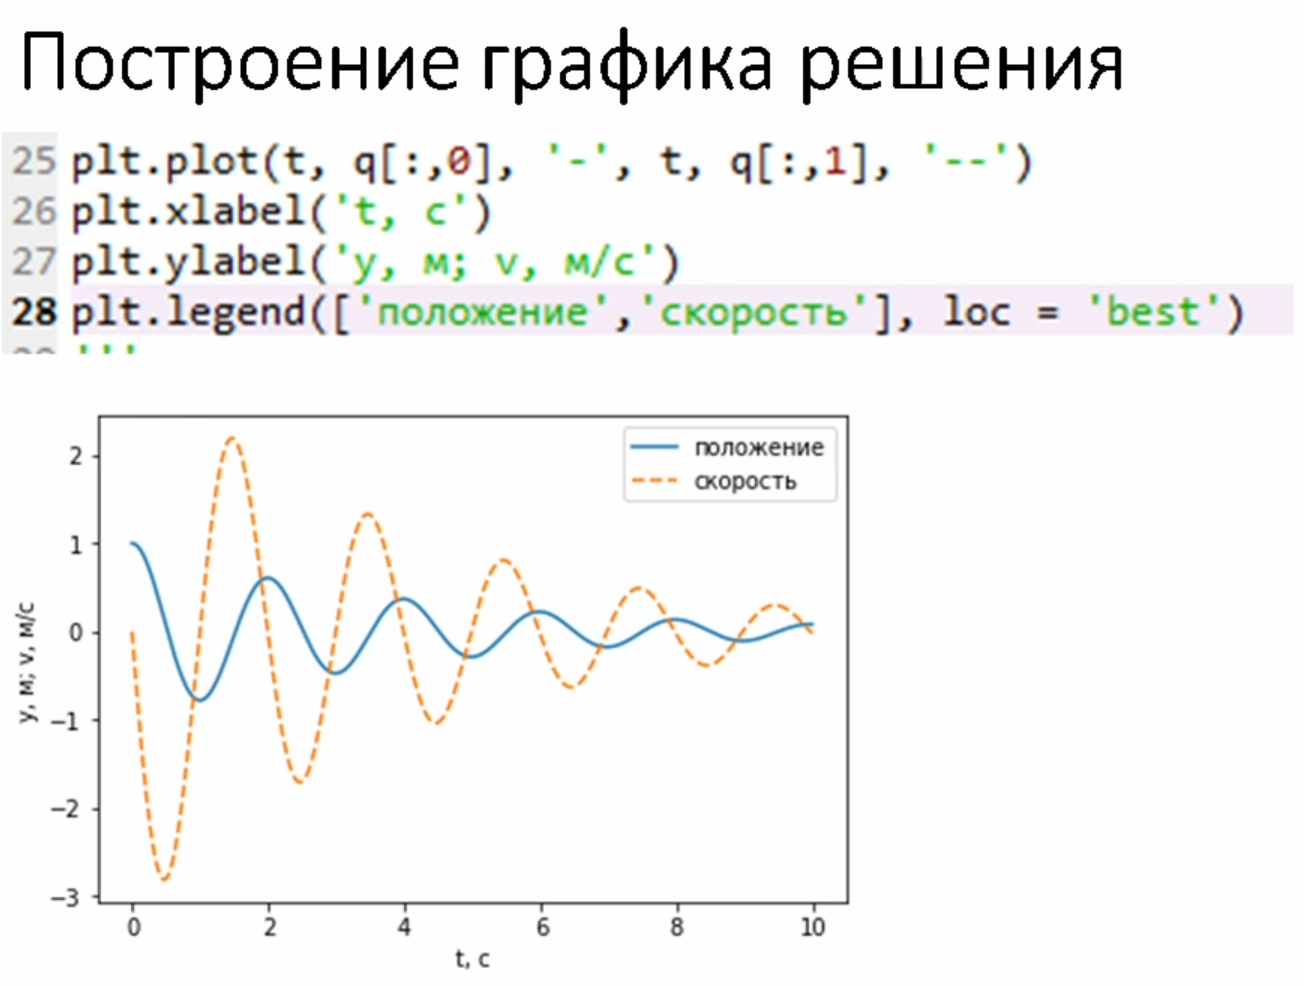